# Task-3 Exploratory Data Analysis on dataset Samplesuperstore

Exploratory Data Analysis (EDA) is the crucial process of using summary statistics and graphical representations to perform preliminary investigations on data in order to uncover patterns, detect anomalies, test hypotheses, and verify assumptions 
## Task

As a business manager try to analyse and find the areas where we can work to make more profit and build our business.

Author : Anujith R


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

Read the dataset

In [3]:
data=pd.read_csv("SampleSuperstore.csv")

In [4]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
data.shape

(9994, 13)

In [6]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

There is no null values

In [8]:
data.Quantity.value_counts()

3     2409
2     2402
5     1230
4     1191
1      899
7      606
6      572
9      258
8      257
10      57
11      34
14      29
13      27
12      23
Name: Quantity, dtype: int64

In [9]:
data['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

In [10]:
data['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

# EDA


### The purpose of EDA in data science is
In data mining, Exploratory Data Analysis (EDA) is an approach to analyzing datasets to summarize their main characteristics, often with visual methods. EDA is used for seeing what the data can tell us before the modeling task.

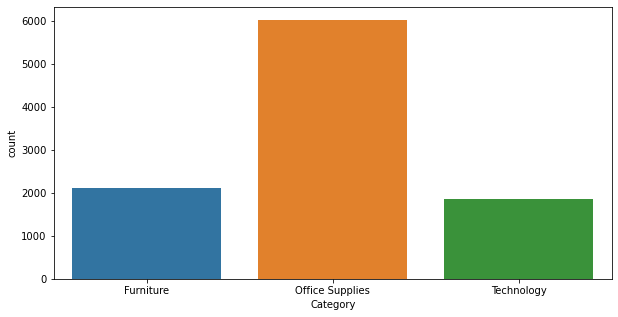

In [11]:

plt.figure(figsize=(10,5))
sns.countplot(data.Category)
plt.show()

In this graph we can conclude that  Office Supplies Category has more sales

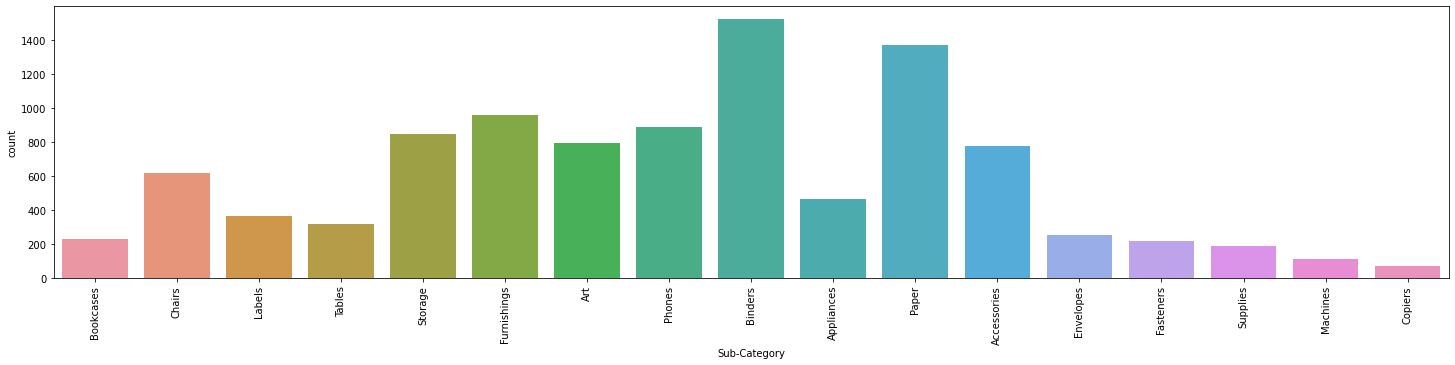

In [12]:
plt.figure(figsize=(25,5))
sns.countplot(x=data['Sub-Category'])
plt.xticks(rotation=90)
plt.show()

##### In this graph , we can see that more saled products are "Binders" and "Paper".Also some product has only very less sales

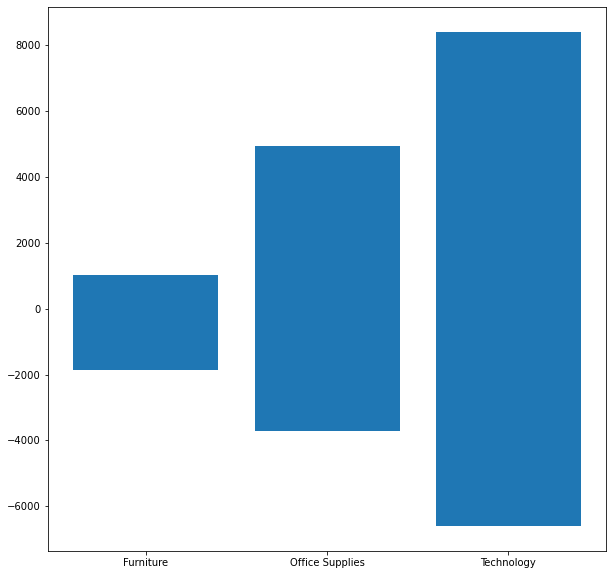

In [13]:
plt.figure(figsize=(10,10))
plt.bar(data['Category'],data['Profit'])
plt.show()


By ploting Profits Vs Category , We can see all Categories have losses and profits .
By this result, we can conclude that in each category there are some prodects have losses during sale.

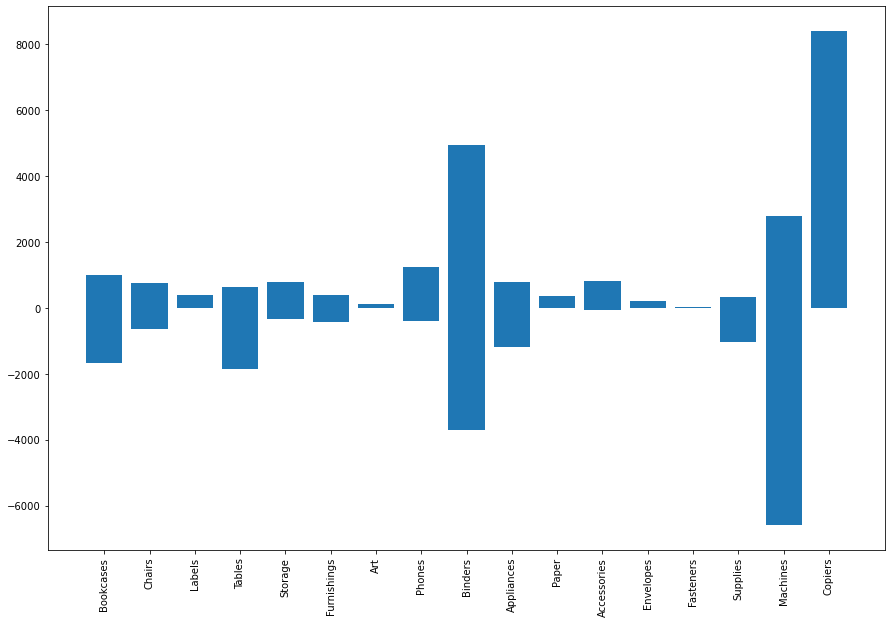

In [14]:
plt.figure(figsize=(15,10))
plt.bar(data['Sub-Category'],data['Profit'])
plt.xticks(rotation=90)
plt.show()

From this graph, we understand that Copiers have more profit during sales.
Bookcases ,Chairs,Tables,Appliances, Supplies are more loss product.

<function matplotlib.pyplot.show(close=None, block=None)>

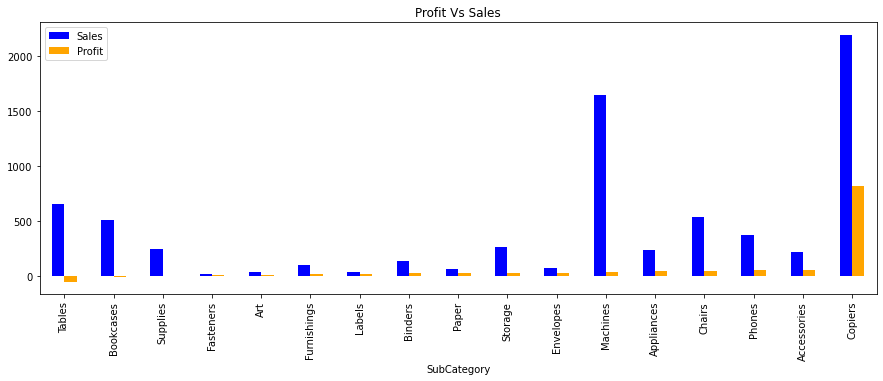

In [18]:
d1=data.groupby('Sub-Category')[['Sales','Profit']].mean().sort_values(by='Profit',ascending=True)
d1[:].plot.bar(color=['blue','orange'],figsize=(15,5))
plt.title("Profit Vs Sales")
plt.xlabel('SubCategory')
plt.xticks(rotation=90)
plt.show


In this graph we can understand some products are not profitable, and only Copiers shows decend sale profit ratio.

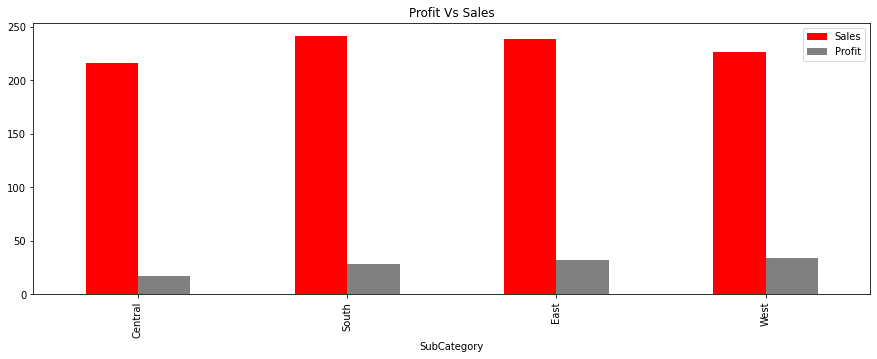

In [21]:
d2=data.groupby('Region')[['Sales','Profit']].mean().sort_values(by='Profit',ascending=True)
d2[:].plot.bar(color=['red','gray'],figsize=(15,5))
plt.title("Profit Vs Sales")
plt.xlabel('SubCategory')
plt.show()

In central region, less sales. All other region are almost same.

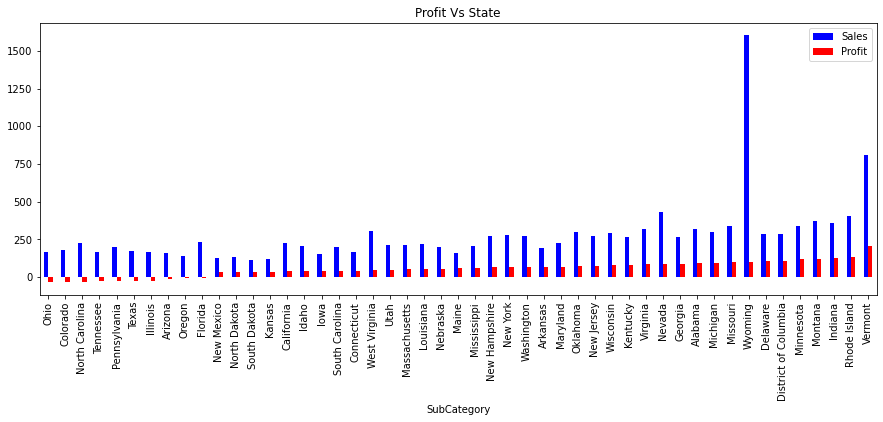

In [24]:
d3=data.groupby('State')[['Sales','Profit']].mean().sort_values(by='Profit',ascending=True)
d3[:].plot.bar(color=['blue','red'],figsize=(15,5))
plt.title("Profit Vs State")
plt.xlabel('SubCategory')
plt.show()

Almost 10 stats shows bad performance. Almost other products have decend profit compaired with sales,except Wyoming

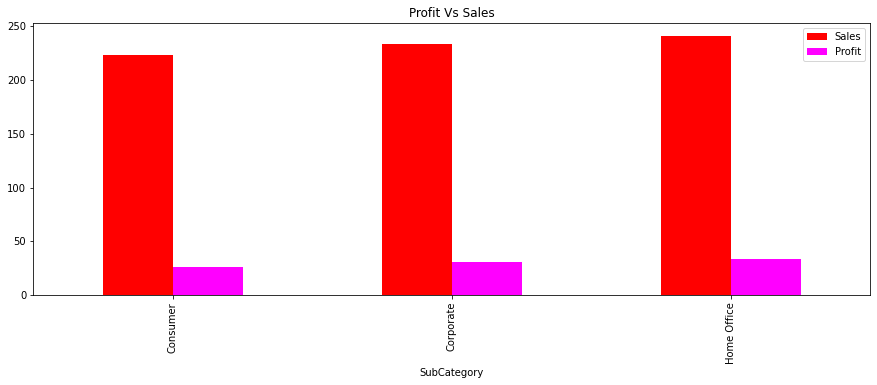

In [26]:
d4=data.groupby('Segment')[['Sales','Profit']].mean().sort_values(by='Profit',ascending=True)
d4[:].plot.bar(color=['red','magenta'],figsize=(15,5))
plt.title("Profit Vs Sales")
plt.xlabel('SubCategory')
plt.show()

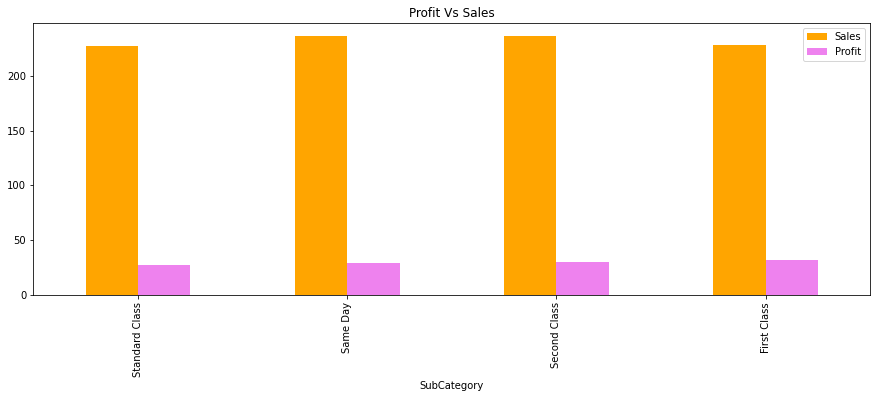

In [28]:
d4=data.groupby('Ship Mode')[['Sales','Profit']].mean().sort_values(by='Profit',ascending=True)
d4[:].plot.bar(color=['orange','violet'],figsize=(15,5))
plt.title("Profit Vs Sales")
plt.xlabel('SubCategory')
plt.show()

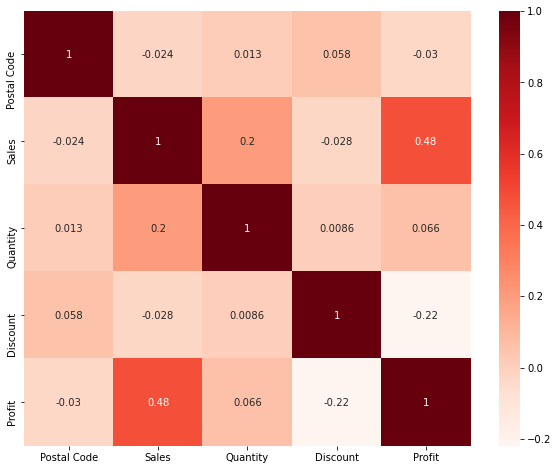

In [30]:
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(data.corr(), cmap="Reds", annot=True)
plt.show()

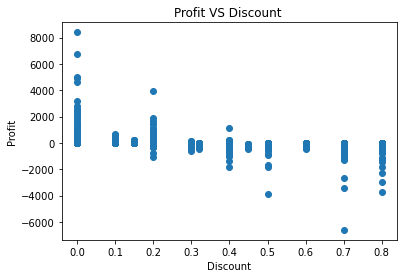

In [35]:
plt.scatter(x=data['Discount'],y=data['Profit'])
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.title('Profit VS Discount ')
plt.show()

This graph shows there are many undemand products, and its need lossable discount

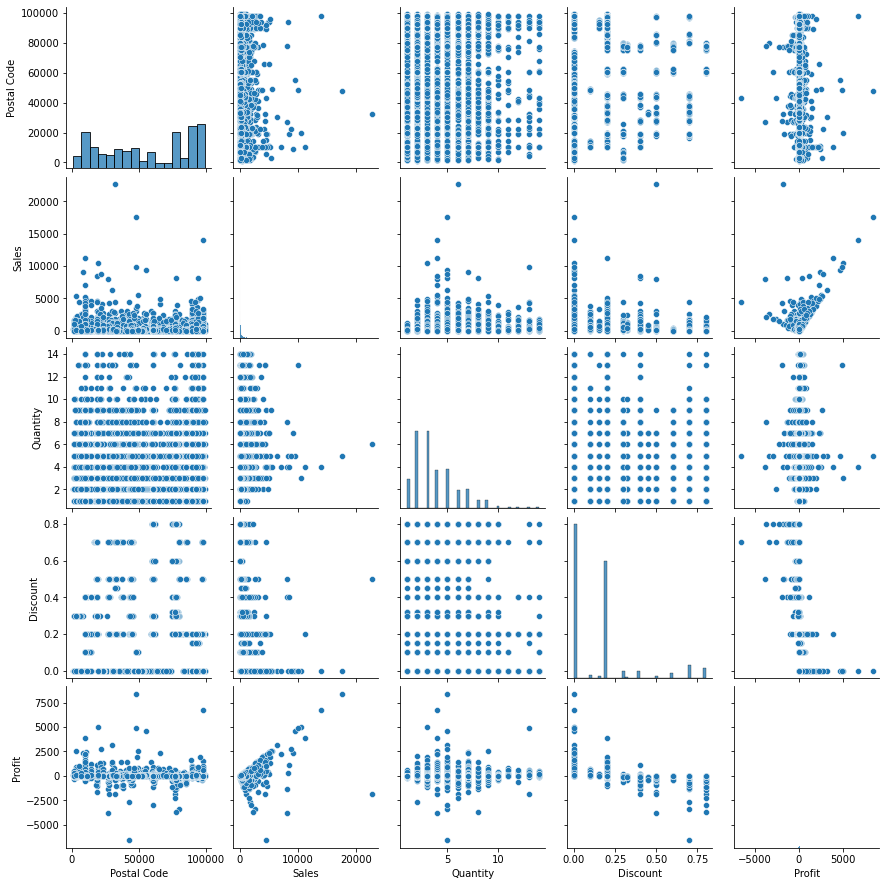

In [40]:
sns.pairplot(data)

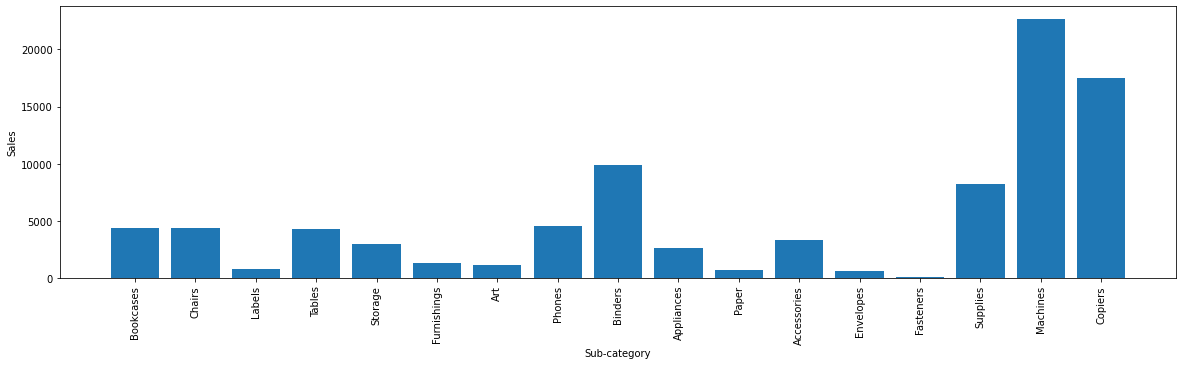

In [43]:
plt.figure(figsize=(20,5))
a=data['Sub-Category']
b=data['Sales']
plt.xticks(rotation=90)
plt.bar(a,b)
plt.xlabel('Sub-category')
plt.ylabel('Sales')
plt.show()

# Observation & Conclusion

Highest Sales in "Wyoming " State
Lowest sales in "South Dakota" State

### Top Profitable states are 
1.Vermont
2.Rhode Island
3.Indiana
### Less Profitable states:
1.Ohio
2.Colorado
3.North Carolina

To increse the performance we have to focus on the less performed states first and find the real problems and its solutions.
Also we have to focus more on sales in Central Region.
#### Highest Profit in "Technology" Category and lowest profit in "Furniture" Category.
 Focus on Furniture sales and convert it modern or latest products.
#### Profit is high in "first class" ship mode and low profit in "Standard Class" Ship mode
#### High Profit and Sales on "Home Office " Segament and lowest in Consumer segment
#### Highest Profit in "Coipers" Sub-Category and lowest profit in "Tables" Sub-Category
#### Highest Sales in "Wyoming " State and lowest sales in "South Dakota" State

### Thank You!